In [18]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
import sys
sys.path.append("C:\\Users\\Maxcell-HomePC\\QishiQR")
import Utils.MajorContract_Offsets
import importlib

#importlib.reload(Utils.MajorContract_split)
from Utils.MajorContract_Offsets import *

import Backtesting.Vectorized.lm_validation

#importlib.reload(Backtesting.Vectorized.lm_validation)

from Backtesting.Vectorized.lm_validation import LmValidation

## Bu. Freq=5.

In [6]:
freq=5
offset = [0.1+i for i in range(5)]

bu_train, bu_test, bu_probability_table = MajorContracts(symbol='bu', split_time = '2016-7-1', topdir=r'C:\\Users\\Maxcell-HomePC\\QishiQR\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'], 
                                                    '1609':['2016-2-1','2016-8-1'], 
                                                    '1612':['2016-6-1','2016-11-15'],
                                                    '1706':['2016-10-15','2017-1-31']}, 
                                       transitions={'1606':'2016-3-1', 
                                                    '1609':'2016-7-1', 
                                                    '1612':'2016-11-1', 
                                                    '1706':'2017-1-1' },
                                        freq = freq, offset = offset).create_major_overlap()


bu1606 C:\\Users\\Maxcell-HomePC\\QishiQR\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104 20160229
bu1609 C:\\Users\\Maxcell-HomePC\\QishiQR\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
bu1612 C:\\Users\\Maxcell-HomePC\\QishiQR\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-

In [8]:
for offset in bu_test.keys():
    bu_test[offset].to_csv(r'../../Output/bu_major_' + str(freq) + '_' + offset + '.csv')
    for contract in ['1606', '1609', '1612']:
        bu_probability_table[contract].to_csv(r'../../Strategy/bu_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)

In [9]:
#bu
filepath = "C:\\Users\\Maxcell-HomePC\\QishiQR\\Strategy"
fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_major_strategy_5_*.csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
             
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm['max_pct'] = slm.loc[:, '0':'2'].max(axis=1) / slm['total']
slm.to_csv('../../Strategy/bu_major_strategy_'+str(freq)+'min.csv')
print(slm.head())

bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
bu_1612_major_strategy_5_0.1.csv
bu_1612_major_strategy_5_1.1.csv
bu_1612_major_strategy_5_2.1.csv
bu_1612_major_strategy_5_3.1.csv
bu_1612_major_strategy_5_4.1.csv
   prior       0      1      2   total signal   max_pct
0      p  243325  88580  93195  425100      0  0.572395
1     p0  201285  20615  21395  243295      0  0.827329
2    p00  189285   5590   6380  201255      0  0.940523
3   p000  185255   1860   2140  189255      0  0.978864
4  p0000  183395    820   1015  185230      0  0.990093


In [10]:
p1 = slm[slm['prior'].apply(len) == 2]
p2 = slm[slm['prior'].apply(len) == 3]
p3 = slm[slm['prior'].apply(len) == 4]
p4 = slm[slm['prior'].apply(len) == 5]
p5 = slm[slm['prior'].apply(len) == 6]
p6 = slm[slm['prior'].apply(len) == 7]

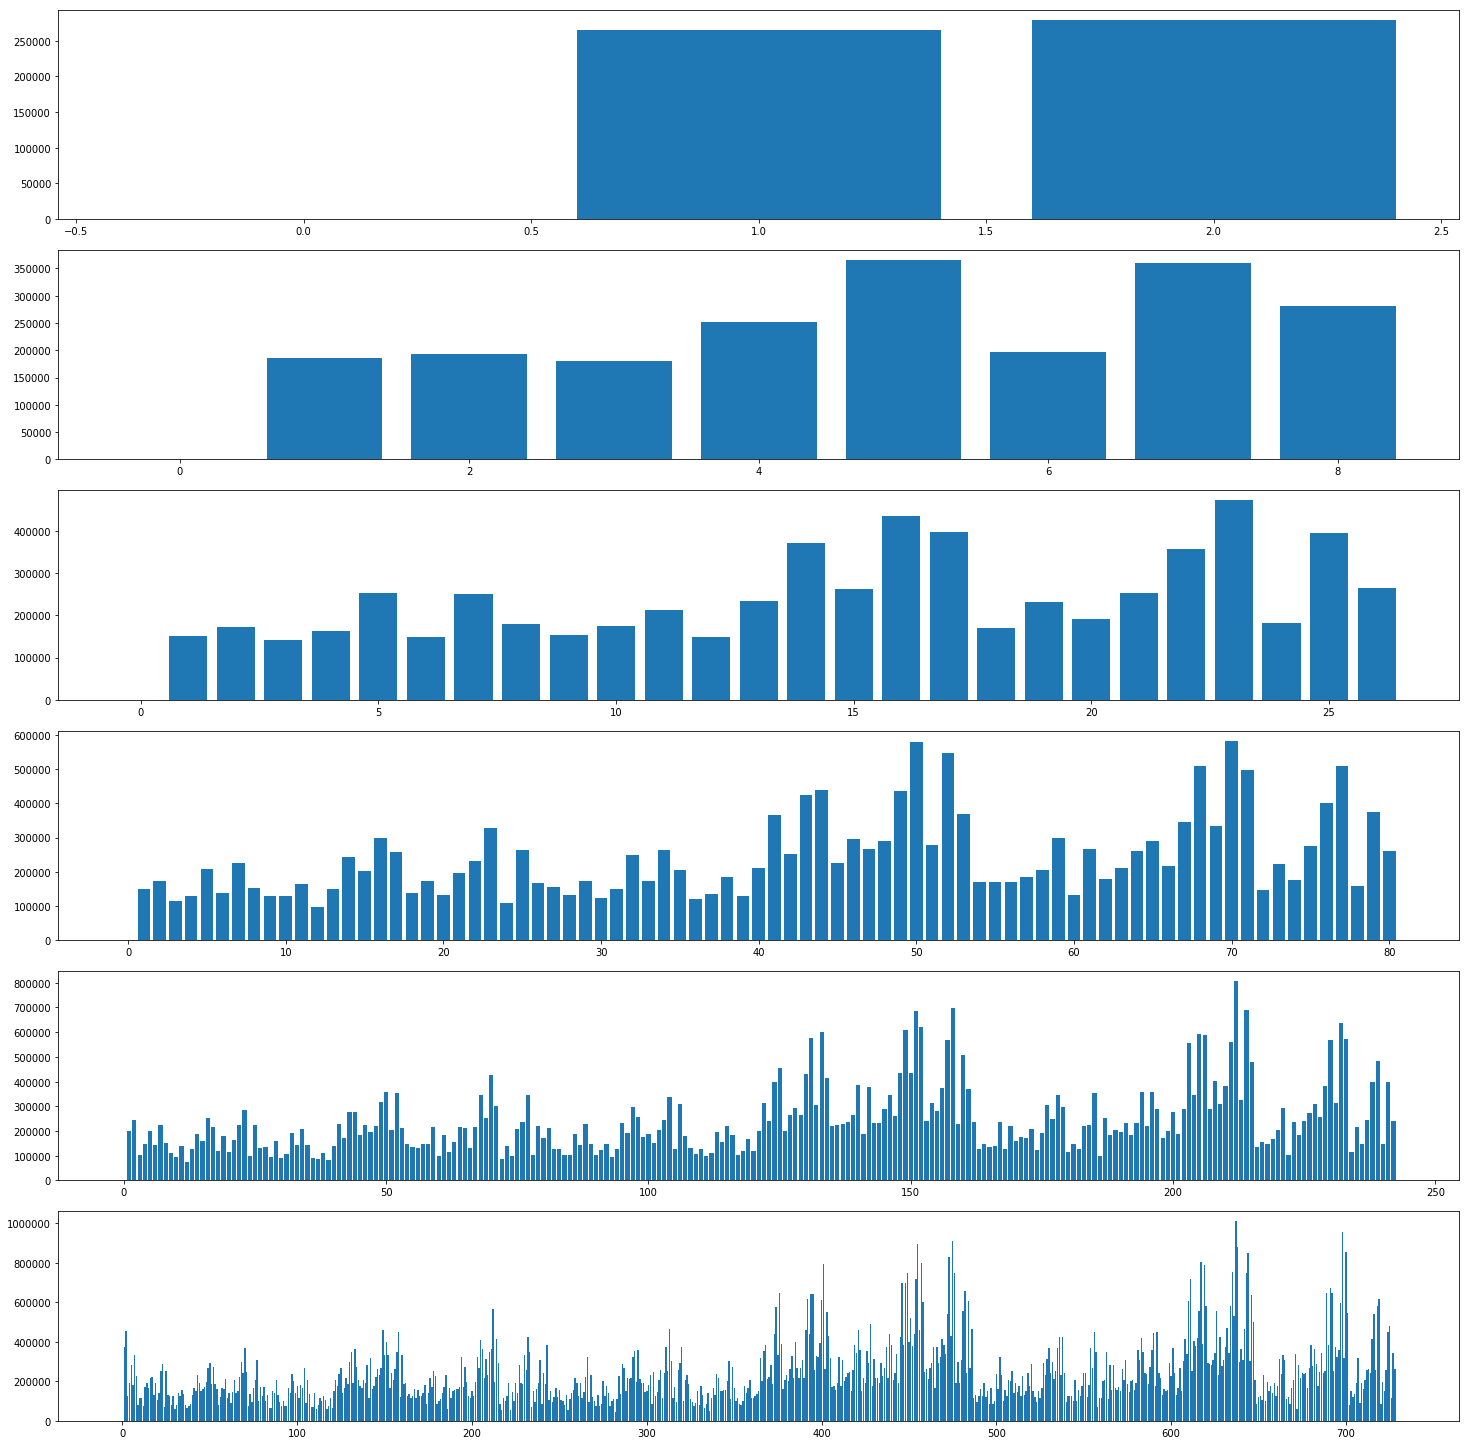

In [11]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
cnt_list1 = p1['total'].tolist()
cnt_list1[0] = 0
cnt_list1 = [cnt_num*3 for cnt_num in cnt_list1]
plt.subplot(6, 1, 1)
plt.bar(range(len(cnt_list1)), cnt_list1)
cnt_list2 = p2['total'].tolist()
cnt_list2[0] = 0
cnt_list2 = [cnt_num*9 for cnt_num in cnt_list2]
plt.subplot(6, 1, 2)
plt.bar(range(len(cnt_list2)), cnt_list2)
cnt_list3 = p3['total'].tolist()
cnt_list3[0] = 0
cnt_list3 = [cnt_num*27 for cnt_num in cnt_list3]
plt.subplot(6, 1, 3)
plt.bar(range(len(cnt_list3)), cnt_list3)
cnt_list4 = p4['total'].tolist()
cnt_list4[0] = 0
cnt_list4 = [cnt_num*81 for cnt_num in cnt_list4]
plt.subplot(6, 1, 4)
plt.bar(range(len(cnt_list4)), cnt_list4)
cnt_list5 = p5['total'].tolist()
cnt_list5[0] = 0
cnt_list5 = [cnt_num*243 for cnt_num in cnt_list5]
plt.subplot(6, 1, 5)
plt.bar(range(len(cnt_list5)), cnt_list5)
cnt_list6 = p6['total'].tolist()
cnt_list6[0] = 0
cnt_list6 = [cnt_num*729 for cnt_num in cnt_list6]
plt.subplot(6, 1, 6)
plt.bar(range(len(cnt_list6)), cnt_list6)
plt.show()

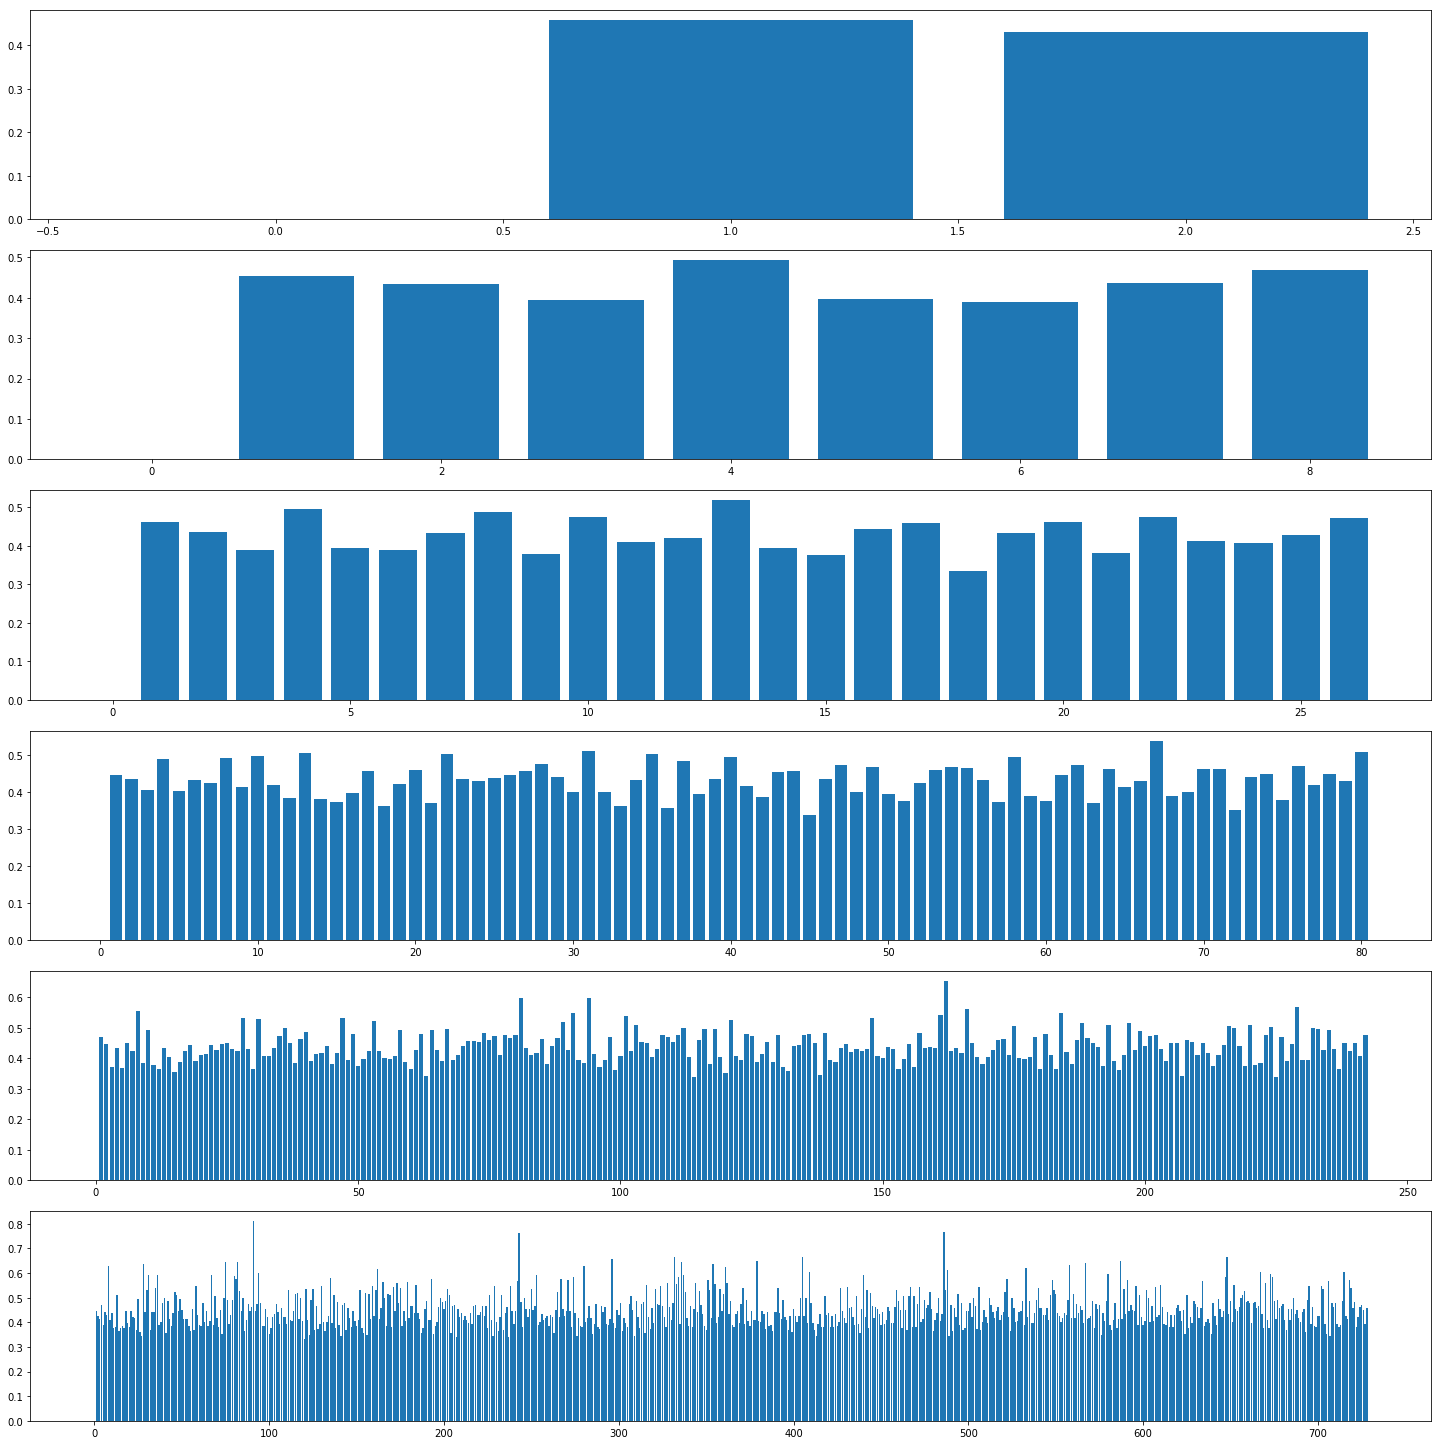

In [12]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
cnt_list1 = p1['max_pct'].tolist()
cnt_list1[0] = 0
plt.subplot(6, 1, 1)
plt.bar(range(len(cnt_list1)), cnt_list1)
cnt_list2 = p2['max_pct'].tolist()
cnt_list2[0] = 0
plt.subplot(6, 1, 2)
plt.bar(range(len(cnt_list2)), cnt_list2)
cnt_list3 = p3['max_pct'].tolist()
cnt_list3[0] = 0
plt.subplot(6, 1, 3)
plt.bar(range(len(cnt_list3)), cnt_list3)
cnt_list4 = p4['max_pct'].tolist()
cnt_list4[0] = 0
plt.subplot(6, 1, 4)
plt.bar(range(len(cnt_list4)), cnt_list4)
cnt_list5 = p5['max_pct'].tolist()
cnt_list5[0] = 0
plt.subplot(6, 1, 5)
plt.bar(range(len(cnt_list5)), cnt_list5)
cnt_list6 = p6['max_pct'].tolist()
cnt_list6[0] = 0
plt.subplot(6, 1, 6)
plt.bar(range(len(cnt_list6)), cnt_list6)
plt.show()

# Bu. Freq=15.

In [20]:
freq= 15
offset = [0.1+i*3 for i in range(5)]

bu_train, bu_test, bu_probability_table = MajorContracts(symbol='bu', split_time = '2016-7-1', topdir=r'C:\\Users\\Maxcell-HomePC\\QishiQR\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'], 
                                                    '1609':['2016-2-1','2016-8-1'], 
                                                    '1612':['2016-6-1','2016-11-15'],
                                                    '1706':['2016-10-15','2017-1-31']}, 
                                       transitions={'1606':'2016-3-1', 
                                                    '1609':'2016-7-1', 
                                                    '1612':'2016-11-1', 
                                                    '1706':'2017-1-1' },
                                        freq = freq, offset = offset).create_major_overlap()


bu1606 C:\\Users\\Maxcell-HomePC\\QishiQR\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
bu1609 C:\\Users\\Maxcell-HomePC\\QishiQR\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
bu1612 C:\\Users\\Maxcell-HomePC\\QishiQR\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00

In [21]:
for offset in bu_test.keys():
    bu_test[offset].to_csv(r'../../Output/bu_major_' + str(freq) + '_' + offset + '.csv')
    for contract in ['1606', '1609', '1612']:
        bu_probability_table[contract].to_csv(r'../../Strategy/bu_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)

In [22]:
#bu
filepath = "C:\\Users\\Maxcell-HomePC\\QishiQR\\Strategy"
fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_major_strategy_15_*.csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
             
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm['max_pct'] = slm.loc[:, '0':'2'].max(axis=1) / slm['total']
slm.to_csv('../../Strategy/bu_major_strategy_'+str(freq)+'min.csv')
print(slm.head())

bu_1606_major_strategy_15_0.1.csv
bu_1606_major_strategy_15_12.1.csv
bu_1606_major_strategy_15_3.1.csv
bu_1606_major_strategy_15_6.1.csv
bu_1606_major_strategy_15_9.1.csv
bu_1609_major_strategy_15_0.1.csv
bu_1609_major_strategy_15_12.1.csv
bu_1609_major_strategy_15_3.1.csv
bu_1609_major_strategy_15_6.1.csv
bu_1609_major_strategy_15_9.1.csv
bu_1612_major_strategy_15_0.1.csv
bu_1612_major_strategy_15_12.1.csv
bu_1612_major_strategy_15_3.1.csv
bu_1612_major_strategy_15_6.1.csv
bu_1612_major_strategy_15_9.1.csv
   prior      0      1      2   total signal   max_pct
0      p  73800  32655  35245  141700      0  0.520819
1     p0  62980   5260   5525   73765      0  0.853792
2    p00  60410   1265   1280   62955      0  0.959574
3   p000  59295    505    585   60385      0  0.981949
4  p0000  58505    340    445   59290      0  0.986760


In [23]:
p1 = slm[slm['prior'].apply(len) == 2]
p2 = slm[slm['prior'].apply(len) == 3]
p3 = slm[slm['prior'].apply(len) == 4]
p4 = slm[slm['prior'].apply(len) == 5]
p5 = slm[slm['prior'].apply(len) == 6]
p6 = slm[slm['prior'].apply(len) == 7]

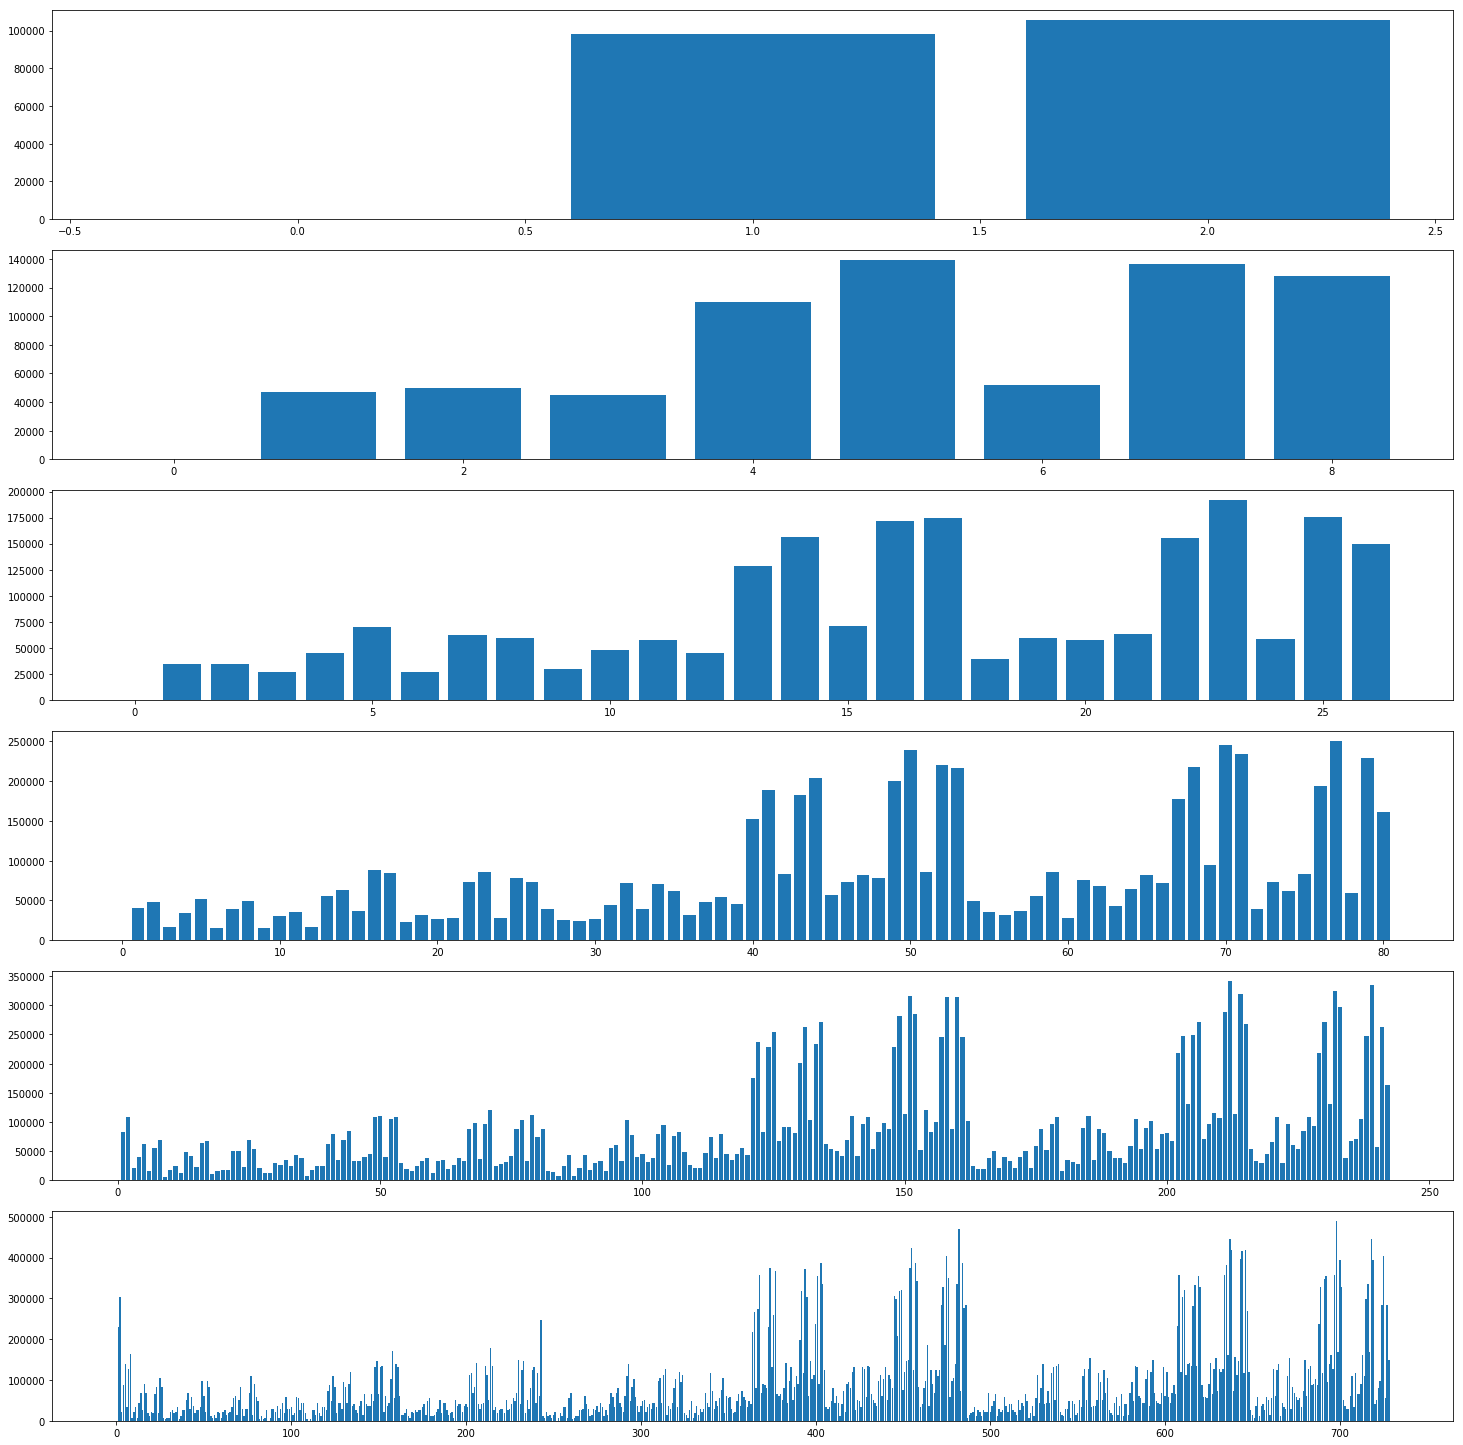

In [24]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
cnt_list1 = p1['total'].tolist()
cnt_list1[0] = 0
cnt_list1 = [cnt_num*3 for cnt_num in cnt_list1]
plt.subplot(6, 1, 1)
plt.bar(range(len(cnt_list1)), cnt_list1)
cnt_list2 = p2['total'].tolist()
cnt_list2[0] = 0
cnt_list2 = [cnt_num*9 for cnt_num in cnt_list2]
plt.subplot(6, 1, 2)
plt.bar(range(len(cnt_list2)), cnt_list2)
cnt_list3 = p3['total'].tolist()
cnt_list3[0] = 0
cnt_list3 = [cnt_num*27 for cnt_num in cnt_list3]
plt.subplot(6, 1, 3)
plt.bar(range(len(cnt_list3)), cnt_list3)
cnt_list4 = p4['total'].tolist()
cnt_list4[0] = 0
cnt_list4 = [cnt_num*81 for cnt_num in cnt_list4]
plt.subplot(6, 1, 4)
plt.bar(range(len(cnt_list4)), cnt_list4)
cnt_list5 = p5['total'].tolist()
cnt_list5[0] = 0
cnt_list5 = [cnt_num*243 for cnt_num in cnt_list5]
plt.subplot(6, 1, 5)
plt.bar(range(len(cnt_list5)), cnt_list5)
cnt_list6 = p6['total'].tolist()
cnt_list6[0] = 0
cnt_list6 = [cnt_num*729 for cnt_num in cnt_list6]
plt.subplot(6, 1, 6)
plt.bar(range(len(cnt_list6)), cnt_list6)
plt.show()

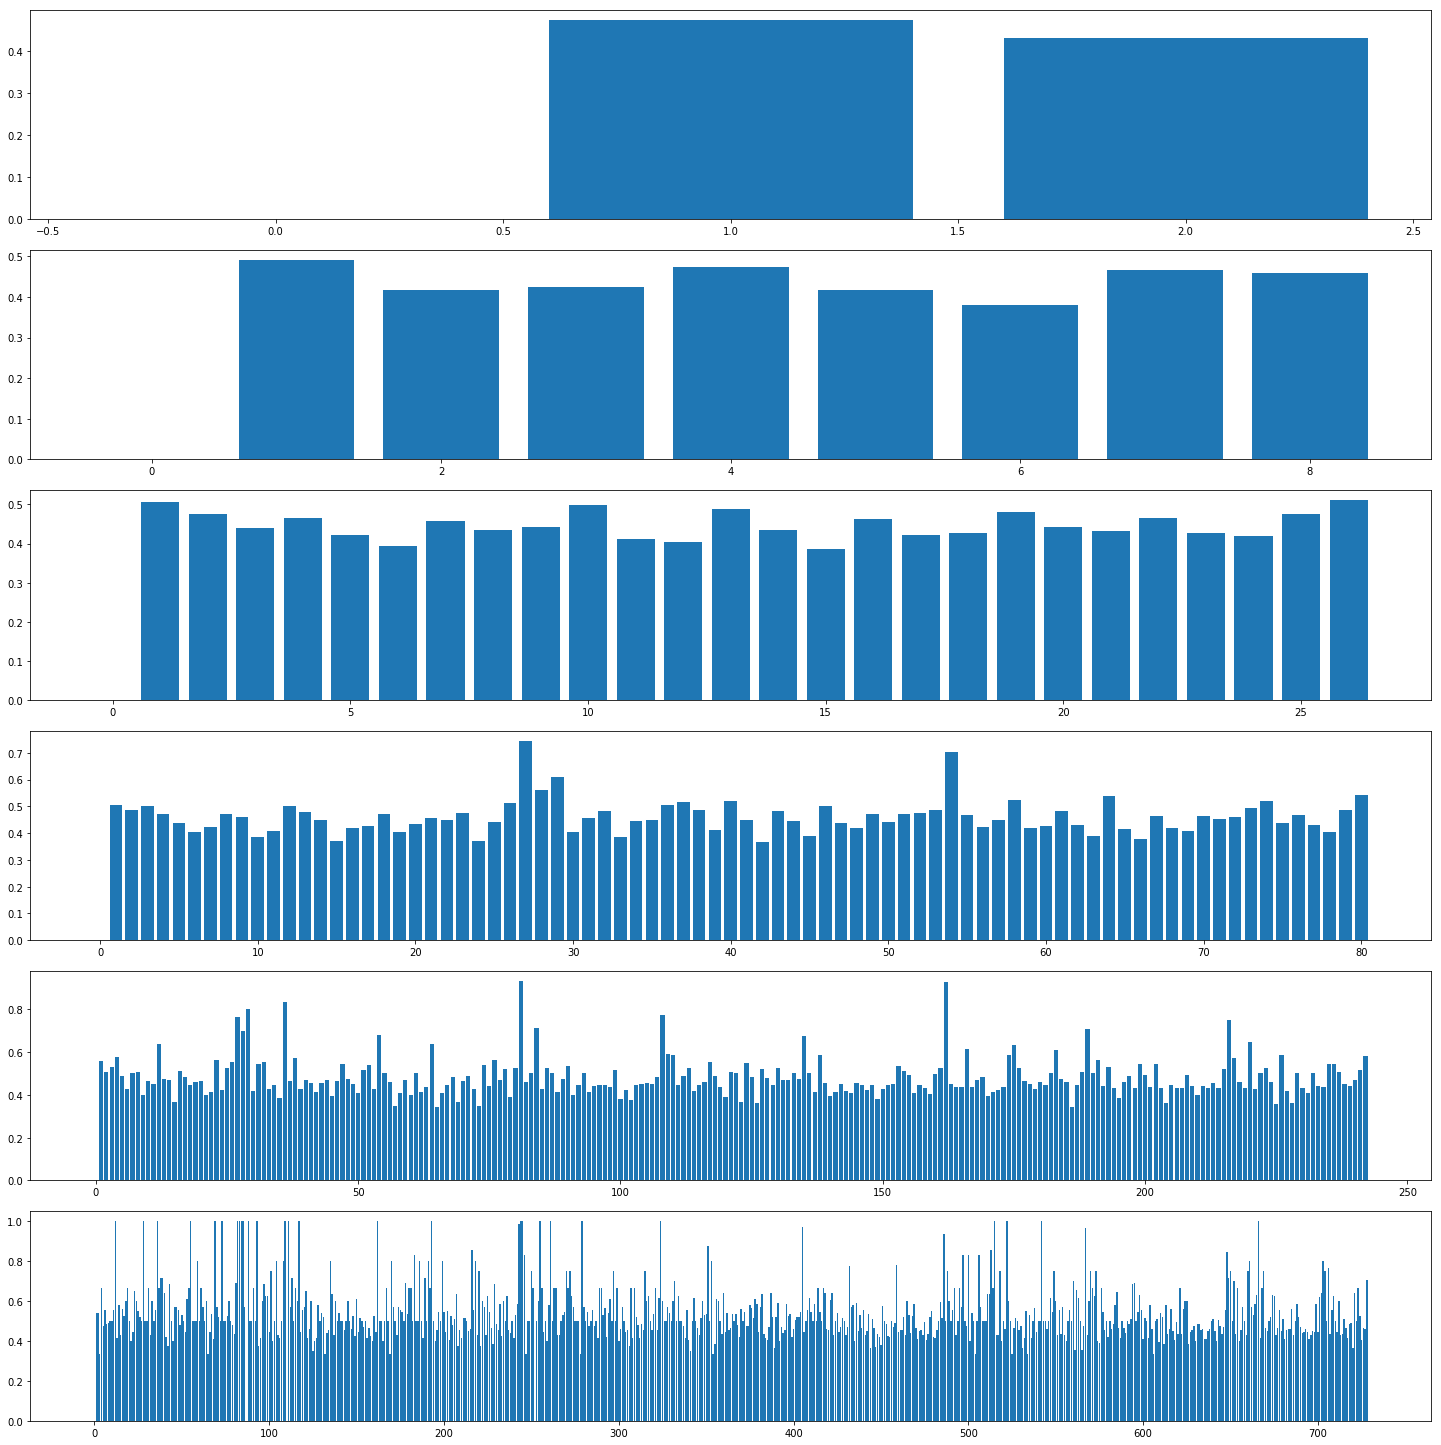

In [25]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
cnt_list1 = p1['max_pct'].tolist()
cnt_list1[0] = 0
plt.subplot(6, 1, 1)
plt.bar(range(len(cnt_list1)), cnt_list1)
cnt_list2 = p2['max_pct'].tolist()
cnt_list2[0] = 0
plt.subplot(6, 1, 2)
plt.bar(range(len(cnt_list2)), cnt_list2)
cnt_list3 = p3['max_pct'].tolist()
cnt_list3[0] = 0
plt.subplot(6, 1, 3)
plt.bar(range(len(cnt_list3)), cnt_list3)
cnt_list4 = p4['max_pct'].tolist()
cnt_list4[0] = 0
plt.subplot(6, 1, 4)
plt.bar(range(len(cnt_list4)), cnt_list4)
cnt_list5 = p5['max_pct'].tolist()
cnt_list5[0] = 0
plt.subplot(6, 1, 5)
plt.bar(range(len(cnt_list5)), cnt_list5)
cnt_list6 = p6['max_pct'].tolist()
cnt_list6[0] = 0
plt.subplot(6, 1, 6)
plt.bar(range(len(cnt_list6)), cnt_list6)
plt.show()